In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!conda info --envs

# conda environments:
#
base                     D:\Anaconda
Quantum                  D:\Anaconda\envs\Quantum
Tensorflow            *  D:\Anaconda\envs\Tensorflow



In [5]:
df = pd.read_csv("PreprocessedinR.csv", encoding = "cp1252", low_memory=False)
df.head()

,state,location,agency,type,spm,pm2_5,date,so2,no2,rspm,Day_of_yr,Month,SOi,NOi,RSPMi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-02-01,4.8,17.4,78.182824,32,2,6.000,21.750,0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,unknown,Industrial Area,0.0,0.0,1990-02-01,3.1,7.0,78.182824,32,2,3.875,8.750,0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-02-01,6.2,28.5,78.182824,32,2,7.750,35.625,0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-03-01,6.3,14.7,78.182824,60,3,7.875,18.375,0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,unknown,Industrial Area,0.0,0.0,1990-03-01,4.7,7.5,78.182824,60,3,5.875,9.375,0,0.0,9.375,Good


In [15]:
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

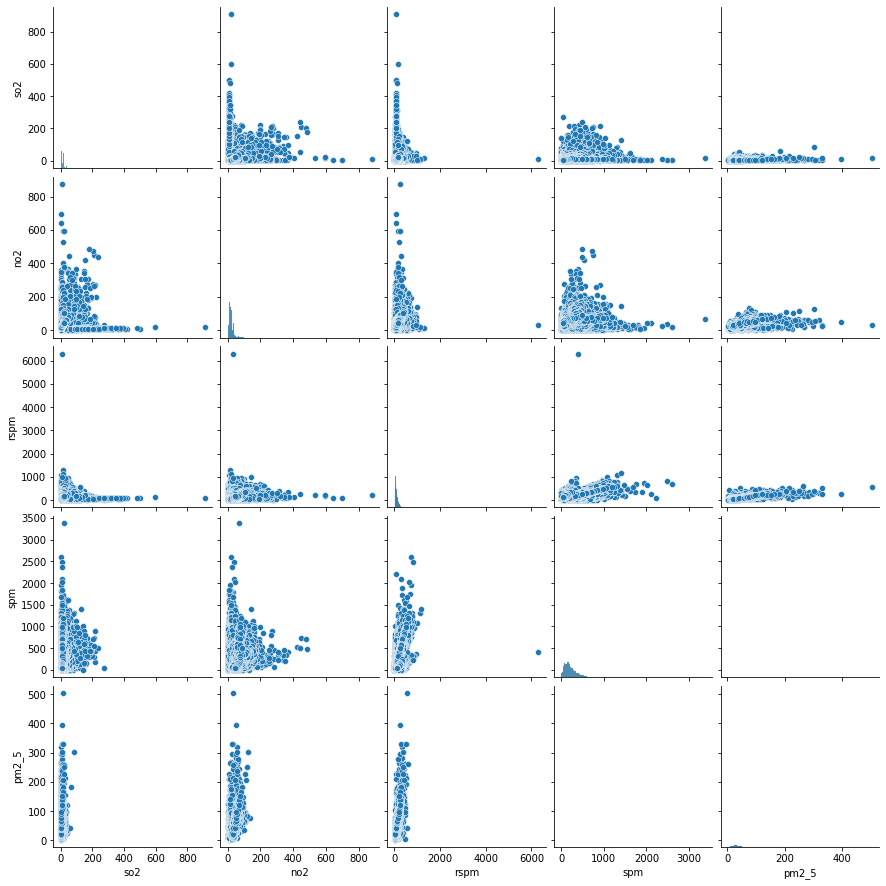

In [20]:
sns.pairplot(data = df)

In [12]:
#MODELS:

#REGRESSION MODELS.

In [13]:
df.rename(columns = {"Day_of_yr":"Day_Of_Year"}, inplace=True)

In [22]:
df.rename(columns = {"RSPMi":"Rpi"}, inplace=True)

In [23]:
df.head()

,state,location,agency,type,spm,pm2_5,date,so2,no2,rspm,Day_Of_Year,Month,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-02-01,4.8,17.4,78.182824,32,2,6.000,21.750,0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,unknown,Industrial Area,0.0,0.0,1990-02-01,3.1,7.0,78.182824,32,2,3.875,8.750,0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-02-01,6.2,28.5,78.182824,32,2,7.750,35.625,0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-03-01,6.3,14.7,78.182824,60,3,7.875,18.375,0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,unknown,Industrial Area,0.0,0.0,1990-03-01,4.7,7.5,78.182824,60,3,5.875,9.375,0,0.0,9.375,Good


In [24]:
X=df[['SOi','Noi','Rpi','SPMi', 'Month', 'Day_Of_Year']]
y=df['AQI']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [27]:
#Linear regression

model=LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [28]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [29]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('RSquared value on train:',model.score(X_train, y_train))
print('RSquared value on test:',model.score(X_test, y_test))

RMSE TrainingData =  13.355928487132466
RMSE TestData =  13.461230341980844
RSquared value on train: 0.985350052149406
RSquared value on test: 0.9850266245121643


In [30]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(X_train,y_train)

rf_train_preds=rf.predict(X_train)
#predicting on test
rf_test_preds=rf.predict(X_test)

In [31]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,rf_train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,rf_test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('RSquared value on train:',rf.score(X_train, y_train))
print('RSquared value on test:',rf.score(X_test, y_test))

RMSE TrainingData =  0.3147073654056851
RMSE TestData =  0.5702298963136417
RSquared value on train: 0.9999918660457898
RSquared value on test: 0.9999731310824894


In [32]:
#CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:
df.columns

Index(['state', 'location', 'agency', 'type', 'spm', 'pm2_5', 'date', 'so2',
       'no2', 'rspm', 'Day_Of_Year', 'Month', 'SOi', 'Noi', 'Rpi', 'SPMi',
       'AQI', 'AQI_Range'],
      dtype='object')

In [34]:
df_new = df

In [35]:
from sklearn.preprocessing import LabelEncoder

featurecols = ['state', 'location', 'agency', 'type']
enc = LabelEncoder()

df[featurecols] = df[featurecols].apply(enc.fit_transform)

In [36]:
X2 = df[['SOi','Noi','Rpi','SPMi','state', 'location', 'agency', 'type', 'Month', 'Day_Of_Year']]
y2 = df['AQI_Range']

In [37]:
y2.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: AQI_Range, dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y2 = enc.fit_transform(y2)

In [39]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=70)

In [40]:
#LOGISTIC REGRESSION
 
log_reg = LogisticRegression()
log_reg.fit(X_train2, Y_train2)

 
logreg_train_preds = log_reg.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, logreg_train_preds))


logreg_test_preds = log_reg.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, logreg_test_preds))

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,logreg_test_preds))

Model accuracy on train is:  0.8129735254158456
Model accuracy on test is:  0.8125304080414927
KappaScore is:  0.7211075991550345


D:\Anaconda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
#RANDOMFOREST CLASSIFIER


RF=RandomForestClassifier()
RF.fit(X_train2,Y_train2)

RF_train_preds = RF.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, RF_train_preds))

RF_test_preds = RF.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, RF_test_preds))

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,RF_test_preds))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998898425666682
KappaScore is:  0.9998370046014028


In [42]:
#KNN

KNN = KNeighborsClassifier()
KNN.fit(X_train2,Y_train2)

knn_tr_preds = KNN.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, knn_tr_preds))

knn_test_preds = KNN.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, knn_test_preds))

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,knn_test_preds))

Model accuracy on train is:  0.9845534326385234
Model accuracy on test is:  0.9738743287281406
KappaScore is:  0.9612782515407441


In [43]:
#Weighted KNN
from sklearn.neighbors import KNeighborsClassifier

we_knn = KNeighborsClassifier(n_neighbors=4)
we_knn.fit(X_train2, Y_train2)



we_knn_tr_preds = we_knn.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, we_knn_tr_preds))

we_knn_test_preds = we_knn.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, we_knn_test_preds))

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,we_knn_test_preds))

Model accuracy on train is:  0.9822584790883833
Model accuracy on test is:  0.9703860100059669
KappaScore is:  0.9559774931654882


In [44]:
#Neural Netwok (ANN) (Regression)

In [45]:
print(len(df))

435739


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [47]:
X_train.shape

(348591, 6)

In [52]:
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [54]:
model.fit(x = X_train, y = y_train, epochs = 600, batch_size = 256, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/600
1362/1362 [==============================] - 3s 2ms/step - loss: 21320.7695 - val_loss: 4697.1113- loss: 21935.5
Epoch 2/600
1362/1362 [==============================] - 2s 2ms/step - loss: 8638.2461 - val_loss: 5211.3130
Epoch 3/600
1362/1362 [==============================] - 3s 2ms/step - loss: 7278.1870 - val_loss: 5484.3613
Epoch 4/600
1362/1362 [==============================] - 3s 2ms/step - loss: 6806.2090 - val_loss: 5236.3438TA: 1s
Epoch 5/600
1362/1362 [==============================] - 2s 2ms/step - loss: 6426.5464 - val_loss: 5122.9561TA: 1s - loss: - ETA: 1s - loss: 6 - ETA - ETA: 0s -
Epoch 6/600
1362/1362 [==============================] - 2s 2ms/step - loss: 6280.6030 - val_loss: 5027.5972
Epoch 7/600
1362/1362 [==============================] - 2s 2ms/step - loss: 6137.7153 - val_loss: 4859.5679 614
Epoch 8/600
1362/1362 [==============================] - 2s 2ms/step - loss: 6031.8608 - val_loss: 4473.7036
Epoch 9/600
1362/1362 [===========================

1362/1362 [==============================] - 2s 2ms/step - loss: 4603.1870 - val_loss: 4484.8306
Epoch 74/600
1362/1362 [==============================] - 3s 2ms/step - loss: 4637.0474 - val_loss: 4532.9282: 0s - loss: - ETA: 0s - loss:
Epoch 75/600
1362/1362 [==============================] - 3s 2ms/step - loss: 4634.6440 - val_loss: 4376.3223
Epoch 76/600
1362/1362 [==============================] - 3s 2ms/step - loss: 4604.5620 - val_loss: 4440.2056
Epoch 77/600
1362/1362 [==============================] - 2s 2ms/step - loss: 4572.6489 - val_loss: 4575.5054
Epoch 78/600
1362/1362 [==============================] - 3s 2ms/step - loss: 4626.0723 - val_loss: 4391.6919
Epoch 79/600
1362/1362 [==============================] - 3s 2ms/step - loss: 4623.7666 - val_loss: 4336.8345
Epoch 80/600
1362/1362 [==============================] - 3s 2ms/step - loss: 4626.0684 - val_loss: 4333.8965 - loss: - E
Epoch 81/600
1362/1362 [==============================] - 3s 2ms/step - loss: 4657.7495 - v

<AxesSubplot:>

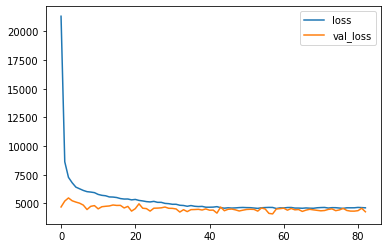

In [55]:
pd.DataFrame(model.history.history).plot()

In [56]:
preds = model.predict(X_test)

In [57]:
mean_squared_error(y_test, preds)

4278.990449086848

In [58]:
#Neural Network (Classification)

In [59]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y2 = enc.fit_transform(y2)

In [60]:
model2 = Sequential()
model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(5, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(5, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=6,activation='softmax'))
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [61]:
print(df_new.AQI_Range.unique())

['Good' 'Poor' 'Moderate' 'Unhealthy' 'Very Unhealthy' 'Hazardous']


In [62]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [63]:
model2.fit(x = X_train2, y = Y_train2, epochs = 600, batch_size = 256, validation_data = (X_test2, Y_test2), callbacks = [early_stop])

Epoch 1/600
1277/1277 [==============================] - 4s 2ms/step - loss: 2.3132 - accuracy: 0.4764 - val_loss: 1.2811 - val_accuracy: 0.5023
Epoch 2/600
1277/1277 [==============================] - 3s 2ms/step - loss: 1.2583 - accuracy: 0.5180 - val_loss: 0.9971 - val_accuracy: 0.6721
Epoch 3/600
1277/1277 [==============================] - 3s 2ms/step - loss: 1.1006 - accuracy: 0.5785 - val_loss: 0.8262 - val_accuracy: 0.7040oss:
Epoch 4/600
1277/1277 [==============================] - 3s 2ms/step - loss: 0.8709 - accuracy: 0.6602 - val_loss: 0.5641 - val_accuracy: 0.7295oss: 0.9441 - accuracy - ETA: 1s - loss: 0.9353 - ac - ETA
Epoch 5/600
1277/1277 [==============================] - 3s 2ms/step - loss: 0.7384 - accuracy: 0.7046 - val_loss: 0.5303 - val_accuracy: 0.7459 - loss: 0.7513 - accura - ETA: 0s - loss: 0.7474 - accuracy:  - ETA: 0s - los
Epoch 6/600
1277/1277 [==============================] - 3s 2ms/step - loss: 0.6914 - accuracy: 0.7271 - val_loss: 0.5251 - val_accurac

<AxesSubplot:>

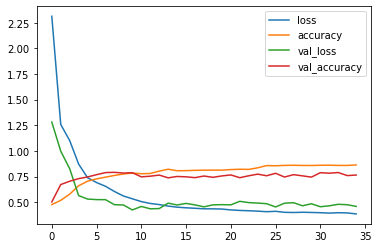

In [64]:
pd.DataFrame(model2.history.history).plot() #Correct one 84 and 87 acc

In [65]:
#Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

#define cross validation method to evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = RidgeCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

model.fit(X_train, y_train)

print(model.alpha_)

0.99


In [66]:
ridge_train_preds = model.predict(X_train)
ridge_test_preds = model.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,ridge_train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,ridge_test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('RSquared value on train:',model.score(X_train, y_train))
print('RSquared value on test:',model.score(X_test, y_test))

RMSE TrainingData =  13.355928487138494
RMSE TestData =  13.461230421068592
RSquared value on train: 0.9853500521493928
RSquared value on test: 0.9850266243362205


In [67]:
#Ridge Classification
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score

rc = RidgeClassifier()

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,max_iter=None, normalize=True, random_state=None, solver='auto',tol=0.001)

rc.fit(X_train2, Y_train2)

train_score = rc.score(X_train2, Y_train2)
print("Train data Score: ", train_score)

test_score = rc.score(X_test2, Y_test2)
print("Test data score: ", test_score)

cv_scores = cross_val_score(rc, X_train2, Y_train2, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

Train data Score:  0.6571064001664606
Test data score:  0.6573920227658696
CV average score: 0.66


In [68]:
from sklearn.metrics import confusion_matrix, classification_report

rc_preds = rc.predict(X_test2)

cm = confusion_matrix(Y_test2, rc_preds)
cr = classification_report(Y_test2, rc_preds)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,rc_preds))

KappaScore is:  0.4275420089176456


D:\Anaconda\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
#Lasso
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=3)

lasso.fit(X_train, y_train)

lasso_tr = lasso.score(X_train, y_train)
lasso_test = lasso.score(X_test, y_test)

lasso_tr_preds = lasso.predict(X_train)
lasso_test_preds = lasso.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,lasso_tr_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,lasso_test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('RSquared value on train:',lasso_tr)
print('RSquared value on test:',lasso_test)

RMSE TrainingData =  13.407974970370192
RMSE TestData =  13.504506556817601
RSquared value on train: 0.9852356514306453
RSquared value on test: 0.9849301946013731


In [75]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada_score_tr = cross_val_score(ada, X_train2, Y_train2, cv = 5)
ada_score_test = cross_val_score(ada, X_test2, Y_test2, cv = 5)

ada.fit(X_train2, Y_train2)

AdaBoostClassifier(n_estimators=100)

In [78]:
preds = ada.predict(X_test2)
preds_train = ada.predict(X_train2)

cm = confusion_matrix(Y_test2,preds)
cm

print("Model accuracy on test is: ", accuracy_score(Y_test2, preds))
print("Model accuracy on train is: ", accuracy_score(Y_train2, preds_train))

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,preds))

Model accuracy on test is:  0.7530843798193435
Model accuracy on train is:  0.7530339100261317
KappaScore is:  0.6062869642074027


In [82]:
#XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train2, Y_train2)

preds_test = xgb.predict(X_test2)

accuracy = accuracy_score(Y_test2, preds_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,preds_test))

Accuracy: 99.97%
KappaScore is:  0.9996055458783337
